In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import gc
import pltutil
import numpy as np
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

def truncSine_func(x,mu=0.,sigma=1.5,deriv=0):
    t=(x-mu)/sigma
    if deriv==0:
        return np.piecewise(t, [t<-1,(t>=-1)&(t<=1),t>1], [0.,lambda t:1./2.+np.sin(t*np.pi/2.)/2., 1.])
    elif deriv==1:
        # multiplicative factor for the first derivative
        return np.piecewise(t, [t<-1+0.01,(t>=-1+0.01)&(t<=1-0.01),t>1-0.01],[0.,lambda t: np.pi/2./sigma*np.cos(t*np.pi/2.)/(1.+np.sin(t*np.pi/2.)), 0.] )


def sigmoid_func(x,mu=0.,sigma=1.5,deriv=0):
    expx=np.exp(-(x-mu)/sigma)
    if deriv==0:
        # sigmoid function
        return 1./(1. + expx)
    elif deriv==1:
        # multiplicative factor for the first derivative
        return 1./sigma*expx/(1. + expx)

def truncSine_func2(x,mu=0.,sigma=1.5,deriv=0):
    t=(x-mu)/sigma
    func=lambda t:1./2.+t/2.+1./2./np.pi*np.sin(t*np.pi)
    
    if deriv==0:
        return np.piecewise(t, [t<-1,(t>=-1)&(t<=1),t>1], [0.,func, 1.])
    elif deriv==1:
        func2= lambda t:(1./2./sigma+1./2./sigma*np.cos(np.pi*t))#/(1./2.+t/2.+1./2./np.pi*np.sin(t*np.pi))
        return np.piecewise(t, [t<-1+0.01,(t>=-1+0.01)&(t<=1-0.01),t>1-0.01],[0.,lambda t: func2(t)/func(t),0.] )
    elif deriv==2:
        func3= lambda t:(-np.pi/2./sigma**2.*np.sin(np.pi*t))
        return np.piecewise(t, [t<-1+0.01,(t>=-1+0.01)&(t<=1-0.01),t>1-0.01],[0.,lambda t: func3(t)/func(t),0.] )
    elif deriv==3:
        func4= lambda t:(-(np.pi)**2./2./sigma**3.*np.cos(np.pi*t))
        return np.piecewise(t, [t<-1+0.01,(t>=-1+0.01)&(t<=1-0.01),t>1-0.01],[0.,lambda t: func4(t)/func(t),0.] )
        
    

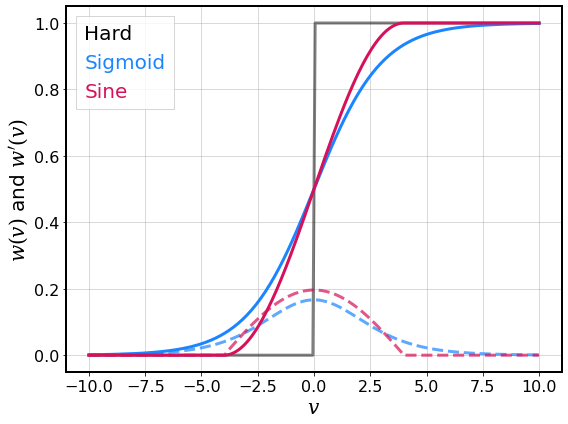

In [2]:
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]
x = np.linspace(-10, 10, 200)
y=np.piecewise(x, [x<0.,x>=0.], [0.,1.])
ax.plot(x,y,color=pltutil.colors[0],ls='-',label='Hard',alpha=0.5,linewidth=3.)
y=sigmoid_func(x)
z=y*sigmoid_func(x,deriv=1)
ax.plot(x,y,color=pltutil.colors[1],ls='-',label='Sigmoid',linewidth=3.)
ax.plot(x,z,color=pltutil.colors[1],ls='--',linewidth=3.,alpha=0.7)
y=truncSine_func(x,sigma=4.)
z=y*truncSine_func(x,sigma=4.,deriv=1)
ax.plot(x,y,color=pltutil.colors[2],ls='-',label='Sine',linewidth=3.)
ax.plot(x,z,color=pltutil.colors[2],ls='--',linewidth=3.,alpha=0.7)

ax.set_xlabel('$v$',fontsize=20)
ax.set_ylabel('$w(v)$ and $w\'(v)$',fontsize=20)
leg=ax.legend(fontsize=20,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    cc=leg.legendHandles[it].get_color()
    text.set_color(cc)
ax.grid()
fig.tight_layout()
fig.savefig('sel_fun.pdf')

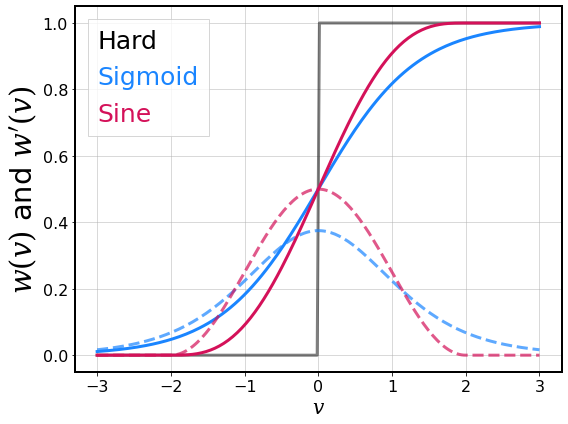

In [92]:
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]
sigma=2.
x = np.linspace(-3, 3., 200)
y=np.piecewise(x, [x<0.,x>=0.], [0.,1.])
ax.plot(x,y,color=pltutil.colors[0],ls='-',label='Hard',alpha=0.5,linewidth=3.)
y=sigmoid_func(x,sigma=sigma/3.)
z=y*sigmoid_func(x,sigma=sigma/3.,deriv=1)
ax.plot(x,y,color=pltutil.colors[1],ls='-',label='Sigmoid',linewidth=3.)
ax.plot(x,z,color=pltutil.colors[1],ls='--',linewidth=3.,alpha=0.7)
y=truncSine_func2(x,sigma=sigma)
z=y*truncSine_func2(x,sigma=sigma,deriv=1)
ax.plot(x,y,color=pltutil.colors[2],ls='-',label='Sine',linewidth=3.)
ax.plot(x,z,color=pltutil.colors[2],ls='--',linewidth=3.,alpha=0.7)

ax.set_xlabel('$v$',fontsize=20)
ax.set_ylabel('$w(v)$ and $w\'(v)$',fontsize=29)
leg=ax.legend(fontsize=25,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    cc=leg.legendHandles[it].get_color()
    text.set_color(cc)
ax.grid()
fig.tight_layout()
fig.savefig('sel_fun.pdf')

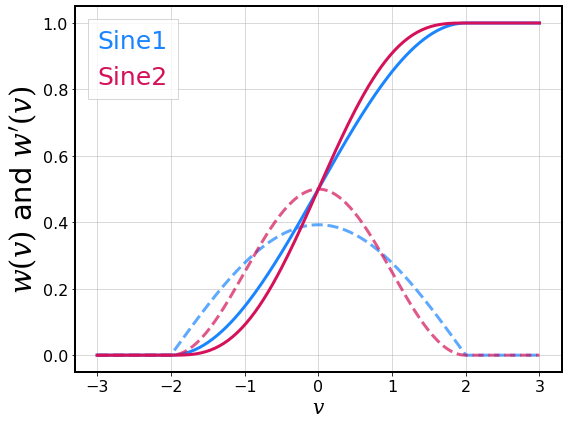

In [105]:
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]
sigma=2.
x = np.linspace(-3, 3., 200)
y=truncSine_func(x,sigma=sigma)
z=y*truncSine_func(x,sigma=sigma,deriv=1)
ax.plot(x,y,color=pltutil.colors[1],ls='-',label='Sine1',linewidth=3.)
ax.plot(x,z,color=pltutil.colors[1],ls='--',linewidth=3.,alpha=0.7)
y=truncSine_func2(x,sigma=sigma)
z=y*truncSine_func2(x,sigma=sigma,deriv=1)
ax.plot(x,y,color=pltutil.colors[2],ls='-',label='Sine2',linewidth=3.)
ax.plot(x,z,color=pltutil.colors[2],ls='--',linewidth=3.,alpha=0.7)

ax.set_xlabel('$v$',fontsize=20)
ax.set_ylabel('$w(v)$ and $w\'(v)$',fontsize=29)
leg=ax.legend(fontsize=25,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    cc=leg.legendHandles[it].get_color()
    text.set_color(cc)
ax.grid()
fig.tight_layout()
fig.savefig('sel_fun.pdf')

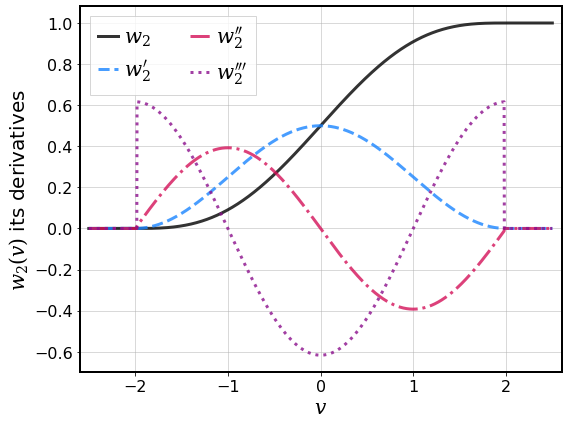

In [94]:
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]
x = np.linspace(-2.5, 2.5, 2000)

sigma=2.
y=truncSine_func2(x,sigma=sigma)
ax.plot(x,y,color=pltutil.colors[0],ls='-',label='$w_2$',linewidth=3.,alpha=0.8)
z=y*truncSine_func2(x,sigma=sigma,deriv=1)
ax.plot(x,z,color=pltutil.colors[1],ls='--',label=r"$w_2'$",linewidth=3.,alpha=0.8)
z=y*truncSine_func2(x,sigma=sigma,deriv=2)
ax.plot(x,z,color=pltutil.colors[2],ls='-.',label=r"$w_2''$",linewidth=3.,alpha=0.8)
z=y*truncSine_func2(x,sigma=sigma,deriv=3)
ax.plot(x,z,color=pltutil.colors[3],ls=':',label=r"$w_2'''$",linewidth=3.,alpha=0.8)

ax.set_xlabel('$v$',fontsize=20)
ax.set_ylabel('$w_2(v)$ its derivatives',fontsize=20)
ax.legend(ncol=2,handletextpad=0.3,handlelength=1.,fancybox=False)
ax.set_xlim(-2.6,2.6)
#leg=ax.legend(fontsize=20,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
#for it,text in enumerate(leg.get_texts()):
#    cc=leg.legendHandles[it].get_color()
#    text.set_color(cc)
ax.grid()
fig.tight_layout()
fig.savefig('sel_fun_deriv.pdf')